# How to define and execute multiple workflows in a single SoS script

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * a
  

## Workflow Specification <a id="Workflow_Specification"></a>

### Forward-style workflows <a id="Forward-style_workflows"></a>

A SoS forward-style workflow has a name and one or more numbered steps. The workflows are defined from sections in a SoS script. 

For example, the following sections specify a workflow with four steps `5`, `10`, `20`, and `100`. The workflow steps can be specified in any order and do not have to be consecutive.

In [69]:
[5]
[20]
[10]
[100]

A workflow specified in this way is the **`default`** workflow and is actually called `default` in SoS output. You can specify a workflow with name and give each step a short description as follows:

In [70]:
[mapping_5 (get data)]
[mapping_20 (align)]
[mapping_10 (quality control)]
[mapping_100 (generate report)]

A SoS script can define multiple workflows. For example, the following sections of SoS script defines two workflows named ``mouse`` and ``human``. 

In [71]:
[mouse_10]
[mouse_20]
[mouse_30]
[human_10]
[human_20]
[human_30]

In this case, a command line option is needed to specify workflow name. This can be done by magic `%run` in Jupyter notebook, or a positional argument from the command line, e.g.

```
    % sos run myscript mouse
```

Note that the workflow argument is not needed if a `default` workflow is defined in the script like the following example

In [72]:
[10]
[20]
[30]
[test_10]
[test_20]
[test_30]

Multiple steps can share a single step as follows

In [73]:
[mouse_10,human_10]
[mouse_20]
[human_20]
[mouse_30,human_30]

and wildcard steps can be used to define a step for multiple workflows:

In [74]:
%run mouse
[*_10]
[mouse_20]
[human_20]
[*_30]

If the steps defined in a shared section is similar but not identical, it can use step variable (discussed elsewhere) `step_name` to behave differently in different workflows. In the following example, the variable `step_name` will be `mouse_20` or `human_20` depending on the workflow being executed, and is used to determine the correct reference genome for different workflows.

In [75]:
[mouse_20,human_20]
reference = "/path/to/mouse/reference" if \
  step_name.startswith('mouse') else "/path/to/human/reference"

print(f"Reference genome {reference} is used")

### Sub- and combined workflows <a id="Sub_and_combined_workflows"></a>

Although workflows are defined separately with all their steps, they do not have to be executed in their entirety. A `subworkflow` refers to a workflow that is defined from one or more steps of an existing workflows. It is specified using syntax `workflow:[from-to]` where `from-to` can be `n` (step `n`), `-n` (up to `n`), `n-m` (step `n` to `m`) and `m-` (from `m`). For example

```python
A              # complete workflow A
A:5-10         # step 5 to 10 of A
A:50-          # step 50 up
A:-10          # up to step 10 of A
A:10           # step 10 of workflow A
```

In practice, the `-n` format is frequently used to execute part of the workflow for debudding purposes, for example:

In [76]:
%run default:-20
[10]
print(step_name)
[20]
print(step_name)
[30]
print(step_name)

default_10
default_20


You can also combine subworkflows to execute multiple workflows one after another. For example,

```python
A + B          # workflow A, followed by B
A:0 + B        # step 0 of A, followed by B
A:-50 + B + C  # up to step 50 of workflow A, followed by B, and C
```

This syntax can be used from the command line, e.g.

```bash
sos-runner myscript align+call
```

or from the `%run` magic of Jupyter notebook

check_10
align_10
align_20
call_10
call_20


> multi.dot (2.2 KiB):

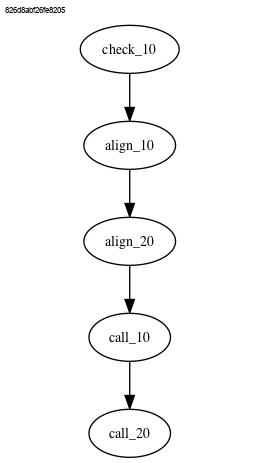

In [77]:
%preview -n multi.dot
%run check+align+call -d multi.dot
[check_10]
print(step_name)
[align_10]
print(step_name)
[align_20]
print(step_name)
[call_10]
print(step_name)
[call_20]
print(step_name)

An option `-d` (dag) is used in this example to generate a graphviz `.dot` file that contains the DAG of workflow during execution. The `.dot` file is previewed as `GIF` animation to demonstrate how the workflow was executed.

## Further reading

* 